# 18-9.프로젝트: 다양한 OCR 모델 비교하기

현재까지 Google OCR API, keras-ocr, Tesseract 의 3가지 OCR 기능을 알아봄.   
하지만 OCR은 아직도 공격적으로 발전하고 있는 단계이기 때문에,   
어떤 모듈을 도입하면 좋을 지 기술 검증을 하는 역할이 필요하다고 생각하고 프로젝트 진행.   



### Step1. 검증용 데이터셋 준비   
CR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다. 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다.

가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.   

    
    -> 데이터는 일단 내 휴대폰에 많이 있고, 나에게 있어서 많이 사용되는 사진들을 모았음.   
    1) 화장품 사진 : 사진으로만 인식해서 어떤 제품인지 뽑아낼 수 있을까? 
    2) 화장품 사진 in Screenshot : 시장 분석/ 제품 개발시에 스크린샷 된 사진들도 인식 가능할까? 
    3) 마지막 그냥 손글씨로 만들어진 quote 이미지 

In [6]:
#이미지 파일 path 만들어놓기 
tar_path = os.path.join(os.getenv("HOME"), 'aiffel', 'ocr_python', 'images')
tar_path

'/home/ssac8/aiffel/ocr_python/images'

In [10]:
#어떤 이미지들 있는지 불러오기 
img_paths = glob(tar_path+'/*')
img_paths

['/home/ssac8/aiffel/ocr_python/images/5.png',
 '/home/ssac8/aiffel/ocr_python/images/2.png',
 '/home/ssac8/aiffel/ocr_python/images/1.png',
 '/home/ssac8/aiffel/ocr_python/images/3.png',
 '/home/ssac8/aiffel/ocr_python/images/4.png']

In [11]:
# 데이터 경로 저장
print(len(img_paths[:]))
img_paths = img_paths[:]

5


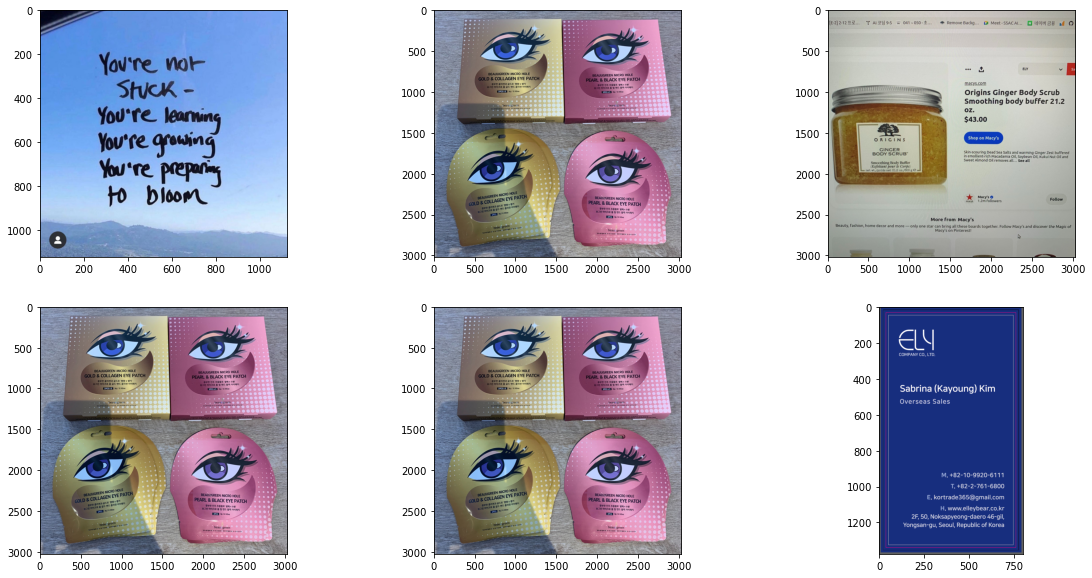

In [20]:
#어떤 이미지들이 있는지 뽑아서 시각적으로 봐보기 
plt.figure(figsize=(20, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    pil_img = Image.open(img_paths[np.random.randint(len(img_paths))])
    plt.imshow(pil_img)
plt.show()

#왜 중복적으로 같은 그림이 나오는지는 도저히 이해가 안된다..

### Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행
위 3가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다.

---


## Google-OCR 써보기

#step1 구글 파이썬 API 인터페이스 모듈 설치 
$ pip install --upgrade google-api-python-client
$ pip install google-cloud-vision  

#step2 google cloud vision api 사용   
$ cp ~/Downloads/sheet-contents-xxxx.json ~/aiffel/ocr_python/my_google_api_key.json   

#step3 인증키 경로 등록 후 커널 재기동   
$ export GOOGLE_APPLICATION_CREDENTIALS=$HOME/aiffel/ocr_python/my_google_api_key.json
   
   재확인 
   $ echo "export GOOGLE_APPLICATION_CREDENTIALS=$HOME/aiffel/ocr_python/my_google_api_key.json" >> ~/.bashrc

In [12]:
#구글 OCR 사용하기 
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [14]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'
# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/download (2)'
path = os.getenv('HOME')+'/aiffel/ocr_python/download (2)'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

-rw-rw-r-- 1 ssac8 ssac8 2329  3월 11 15:19 /home/ssac8/aiffel/ocr_python/my_google_api_key.json


ImportError: cannot import name 'vision' from 'google.cloud' (unknown location)

<결과>   

여기서 계속 import name 'vision'을 못가져온다고 뜨는데, 이 부분 추가 해결 필요함.   
대신 google vision api로 직접 들어가서 돌려본 결과, 화장품으로 인식.   
하지만 아이패치가 아닌 아이 쉐도우로 인식.    
text의 경우 한국어까지 케치 해서 잘 인식 함. 

url = https://vision.googleapis.com/v1/images:annotate

---


## Keras OCR 사용해보기   

(주의) 아래 과정은 GPU를 사용해야하기 때문에 아래 순서대로 진행해서 GPU 사용 설정을 잡아줘야함.  

$ export TF_FORCE_GPU_ALLOW_GROWTH=true
$ echo "export TF_FORCE_GPU_ALLOW_GROWTH=true" >> ~/.bashrc
$ echo $TF_FORCE_GPU_ALLOW_GROWTH #이부분 하였을때 True가 나와야함   

또는 쥬피터에서 아래 사용 가능   

!pip install keras-ocr   

!echo "export TF_FORCE_GPU_ALLOW_GROWTH=true" >> ~/.bashrc   

!echo $TF_FORCE_GPU_ALLOW_GROWTH


In [4]:

import os
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

#keras 파이프라인 만들기 
import matplotlib.pyplot as plt
import keras_ocr

#tesseract 
import pytesseract
from pytesseract import Output

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/ssac8/.keras-ocr/craft_mlt_25k.h5
Looking for /home/ssac8/.keras-ocr/crnn_kurapan.h5


/home/ssac8/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


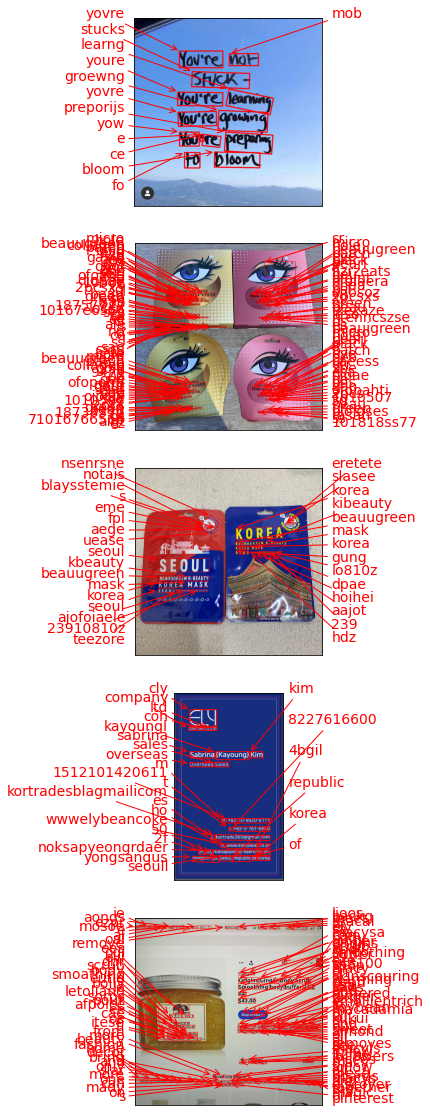

In [23]:
random_idx = np.random.choice(np.arange(len(img_paths)), 5)

image_paths = []
for i in random_idx :
    image_paths.append(img_paths[i])

images = [ keras_ocr.tools.read(path) for path in image_paths]
prediction_groups = [pipeline.recognize([path]) for path in image_paths]

fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## TESSERACT OCR써보기 

$sudo apt install tesseract-ocr   

$sudo apt install libtesseract-dev    

$pip install pytesseract

In [27]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'

In [29]:

#이미지별로 완료 되는 것 표기하게 하기
cropped_image_path_list = []
for i in range(len(image_paths)) :
    img_file_path = image_paths[i]
    if not os.path.exists(os.path.join(work_dir, f'result_{i}')) :
        os.makedirs(os.path.join(work_dir, f'result_{i}'))
    
    tmp = crop_word_regions(img_file_path, os.path.join(work_dir, f'result_{i}'))
    print(f'{i+1}번째 이미지 완료')
    cropped_image_path_list.extend(tmp)
    
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)


/home/ssac8/aiffel/ocr_python/result_0/0000.png
/home/ssac8/aiffel/ocr_python/result_0/0001.png
/home/ssac8/aiffel/ocr_python/result_0/0002.png
/home/ssac8/aiffel/ocr_python/result_0/0003.png
/home/ssac8/aiffel/ocr_python/result_0/0004.png
/home/ssac8/aiffel/ocr_python/result_0/0005.png
/home/ssac8/aiffel/ocr_python/result_0/0006.png
/home/ssac8/aiffel/ocr_python/result_0/0007.png
/home/ssac8/aiffel/ocr_python/result_0/0008.png
1번째 이미지 완료
/home/ssac8/aiffel/ocr_python/result_1/0000.png
/home/ssac8/aiffel/ocr_python/result_1/0001.png
/home/ssac8/aiffel/ocr_python/result_1/0002.png
/home/ssac8/aiffel/ocr_python/result_1/0003.png
/home/ssac8/aiffel/ocr_python/result_1/0004.png
/home/ssac8/aiffel/ocr_python/result_1/0005.png
/home/ssac8/aiffel/ocr_python/result_1/0006.png
/home/ssac8/aiffel/ocr_python/result_1/0007.png
/home/ssac8/aiffel/ocr_python/result_1/0008.png
/home/ssac8/aiffel/ocr_python/result_1/0009.png
/home/ssac8/aiffel/ocr_python/result_1/0010.png
/home/ssac8/aiffel/ocr_python

5번째 이미지 완료
/home/ssac8/aiffel/ocr_python/0000.png
/home/ssac8/aiffel/ocr_python/0001.png
/home/ssac8/aiffel/ocr_python/0002.png
/home/ssac8/aiffel/ocr_python/0003.png
/home/ssac8/aiffel/ocr_python/0004.png
/home/ssac8/aiffel/ocr_python/0005.png
/home/ssac8/aiffel/ocr_python/0006.png
/home/ssac8/aiffel/ocr_python/0007.png
/home/ssac8/aiffel/ocr_python/0008.png
/home/ssac8/aiffel/ocr_python/0009.png
/home/ssac8/aiffel/ocr_python/0010.png
/home/ssac8/aiffel/ocr_python/0011.png
/home/ssac8/aiffel/ocr_python/0012.png
/home/ssac8/aiffel/ocr_python/0013.png
/home/ssac8/aiffel/ocr_python/0014.png
/home/ssac8/aiffel/ocr_python/0015.png
/home/ssac8/aiffel/ocr_python/0016.png
/home/ssac8/aiffel/ocr_python/0017.png
/home/ssac8/aiffel/ocr_python/0018.png
/home/ssac8/aiffel/ocr_python/0019.png
/home/ssac8/aiffel/ocr_python/0020.png
/home/ssac8/aiffel/ocr_python/0021.png
/home/ssac8/aiffel/ocr_python/0022.png
/home/ssac8/aiffel/ocr_python/0023.png
/home/ssac8/aiffel/ocr_python/0024.png
/home/ssac8/ai

### 테서렉트- 잘린 이미지에서 단어 인식하기 

In [30]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)


A


STE


I



ote ee




Backg...

rh



ul


Lg

E

eee

>

FLY

ft

MaCys.coMmM

Origins

Ginger

Body

Scrub

Smoothing

body

buffer

71.2

O27.


$43.00

|


| aad = — si are

TT


ORIGINS

GCINGER

_

BODY

=sCRUB’

if:

my Lh)

a

eae

i

i

|

Skin-scouring

Dea

| Sez

Salk

and

Warming

Ginger

E50

buffered

Ti

emollient-rich

Macadamia

Oil,

Soybean

OiL

KUKI

Mit

Ol

anG

Sweet

Almond

Oil

remove

att.

See

all

Macy's

>

i i

NAYS

UT

Followers

Follow

More

From

Macy's

can

bring

all

these

boards

together.

Follow

Macy's

and

discover

the

Magic

oF

Beauty,

Fashion,

home

decor

and

more

eres

only

One

star

Macy s

OT)

Pinterest!


>

ey | i | | | | = _—

Done


In [32]:
random_idx = np.random.choice(np.arange(len(cropped_image_path_list)), 5, replace=False)

# cropped_image_path_list 에서 랜덤하게 선택해서 copped_image_paths에 저장

cropped_image_pahts = []
for idx in random_idx:
    cropped_image_pahts.append(cropped_image_path_list[idx])
cropped_image_pahts

['/home/ssac8/aiffel/ocr_python/0062.png',
 '/home/ssac8/aiffel/ocr_python/0052.png',
 '/home/ssac8/aiffel/ocr_python/0033.png',
 '/home/ssac8/aiffel/ocr_python/0061.png',
 '/home/ssac8/aiffel/ocr_python/0027.png']

Ti

Done


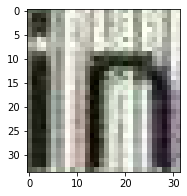

|

Done


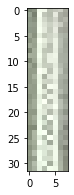

O27.

Done


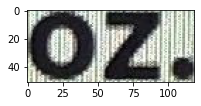

buffered

Done


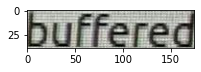

Body

Done


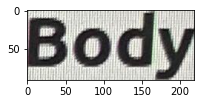

In [33]:
#위에서 뽑은 cropped된 이미지 5개를 recognized된 결과와 비교하기 
for i in range(5) :
    plt.figure(figsize = (3, 3))
    pil_img = Image.open(cropped_image_pahts[i])
    recognize_images([cropped_image_pahts[i]])
    plt.imshow(pil_img)
    plt.show()

총 5개 중에 2개 맞고, 3개는 모두 잘못되게 뽑았다.   
= 40%의 인식률을 가지는걸로 치면 될듯.

----

### Step3. 테스트 결과 정리
모듈들마다 출력 형태가 다릅니다. 분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다. 시각화 방법이 함께 활용된다면 더욱 좋겠군요.

### 구글 OCR 결과 

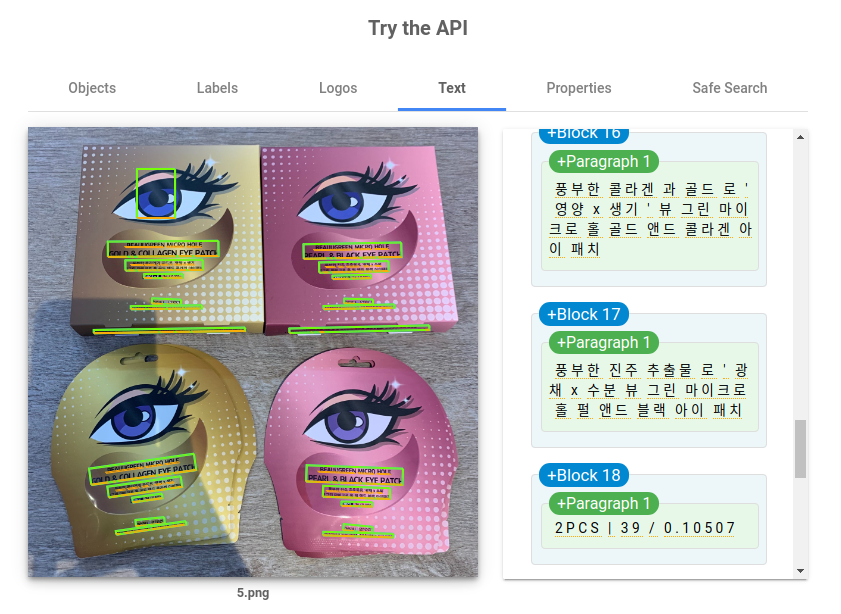

In [39]:
from IPython.display import Image
Image("구글.png")        # 이미지명

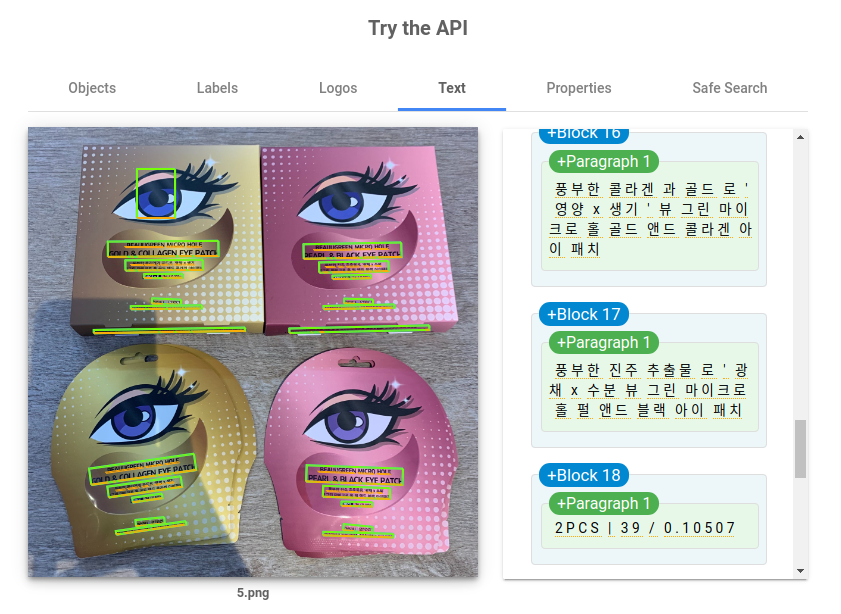

In [40]:
Image("구글2.png") 

### Keras OCR 결과 

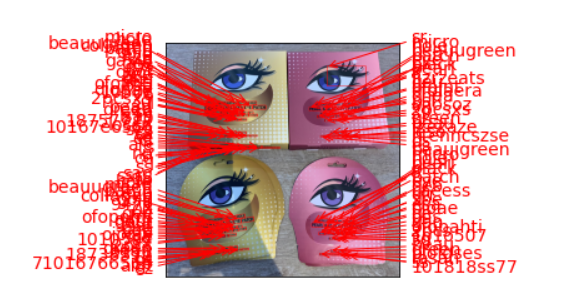

In [42]:
Image("케라스.png") 

### Tesseract OCR 결과 

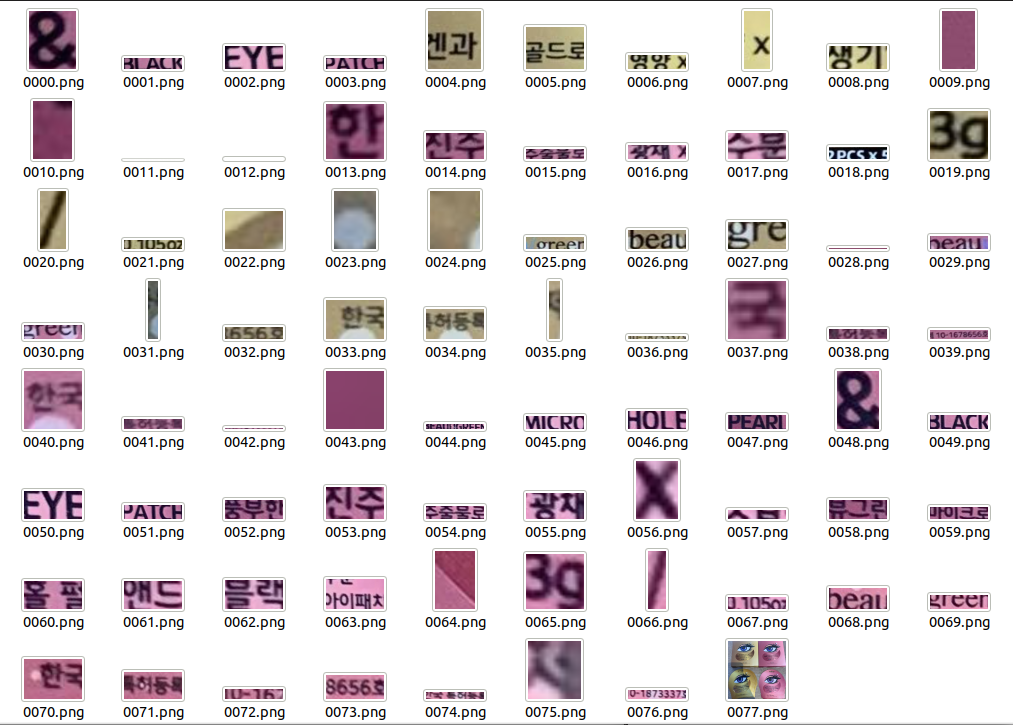

In [43]:
Image("테서렉트.png") 

### Step4. 결과 분석과 결론 제시
우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다.
여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가기준을 제시합니다.
그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

### 평가하기 
한 개의 이미지로 평가하여 표현하자면,    
구글 > 케라스 > 테서렉트 순으로 OCR 개발이 잘 된 것으로 보인다.  

* 구글 같은 경우, object에 대한 분석도 함께 나옴   
그리고 다른 부분으로는 user friendly한 UI도 있기 때문에, 누구나도 손 쉽게 기술을 사용할 수 있고, 이런 기술을 사용할 수록 더욱 더 빨리 발전할 수 있지 않을까 생각이 든다.   

* 케라스의 경우, 단어별로 text를 잘 recognize하는 편으로 보인다. 
그리고 keras의 read tool은 오히려 recognized된 단어를 다시 잘 비교할 수 있도록 보기 쉽게 해주어 유용하다고 생각한다.   
   
* 테서렉트의 경우, 한국어도 뽑아내고, 영어도 같이 뽑아냈지만, 생각보다 너무 불필요하게 인식을 하는 부분도 있기 때문에, 사실상 추천하고 싶지는 않은 것 같다. 